# K-Means Clustering

## Load all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the dataset

In [2]:
df = pd.read_csv('/Users/omkarmutreja/Downloads/K_Means/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,3:].values

## Using the Elbow method to find the optimal number of clusters

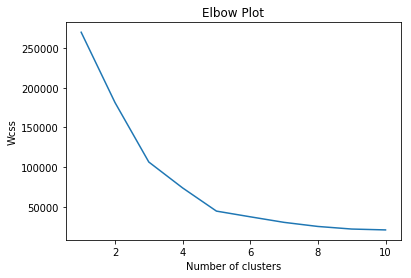

In [4]:
wcss = [] # within sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()
# It can be clearly seen that, the optimal number of clusters are 5

## Applying K-Means and Visualizing the results

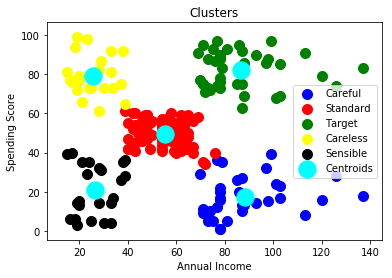

In [5]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='red',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='yellow',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='black',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='cyan',label='Centroids')
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()